# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [6]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression

# Load data

In [7]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [8]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + SVM

Task 1: Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of SVM + PCA.

# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

models = [SVC(gamma='auto'), LogisticRegression(random_state=0), GaussianNB()]
models_names = ['SVC', 'LR', 'GaussianNB']
with_or_without = ['without', 'with']
for i, model in enumerate(models):
    for with_PCA in [0, 1]:
        if with_PCA:
            model_pipeline = make_pipeline(StandardScaler(), PCA(), model)
        else:
            model_pipeline = make_pipeline(StandardScaler(), model)
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy for", models_names[i], with_or_without[with_PCA], accuracy)

Accuracy for SVC without 0.9861111111111112
Accuracy for SVC with 0.9861111111111112
Accuracy for LR without 0.9861111111111112
Accuracy for LR with 0.9861111111111112
Accuracy for GaussianNB without 0.9722222222222222
Accuracy for GaussianNB with 0.9305555555555556


Questions:
Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

A1: Since we're not reducing the number of components or the amount of vriance, it seems resonable to expect a similar result.

Q2: Did the results improve\stayed the same\got worse?

A2: The accuracy of the SVM+PCA is exactly the same as the accuracy of the original SVM model.

Q3: Did the results improved\stayed the same\got worse?

A3: the results stayes the same.

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.

...

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

In [10]:
import matplotlib.pyplot as plt

def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()

In [11]:
X_train.shape

(106, 13)

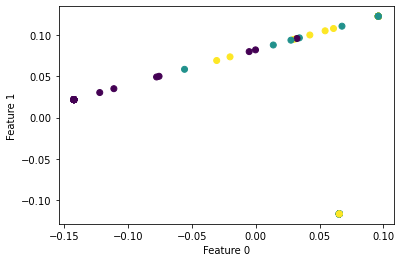

In [27]:
from sklearn.manifold import LocallyLinearEmbedding
# n_neighbors_array = [5, 10, 20]
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(X_train, y_train)
plot(X_transformed, y_train)

Task 6: Use t-SNE to visualize the data. Plot the results.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


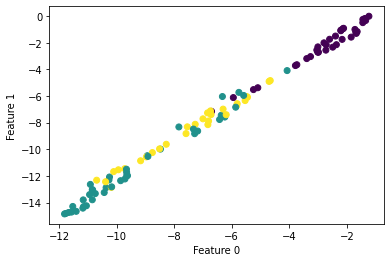

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_transformed = tsne.fit_transform(X_train, y_train)
plot(X_transformed, y_train)

Task 7: Use UMAP to visualize the data. Plot the results.

In [14]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import umap
X_transformed = umap.UMAP(n_neighbors=5, random_state=42).fit_transform(X_train, y_train)

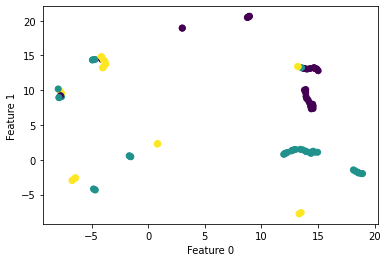

In [24]:
plot(X_transformed, y_train)

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?